In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


## Import Libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## E.D.A

In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.size

1000

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
# CustomerID not important we will drop it.
df = df.drop('CustomerID', axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


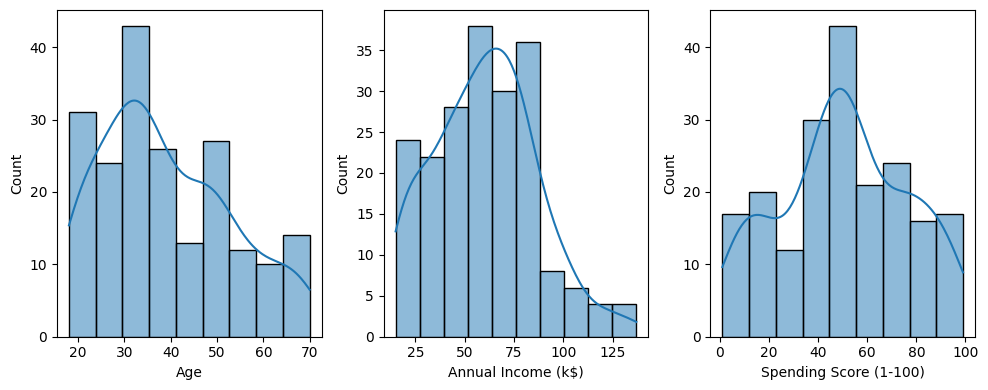

In [10]:
# Visual Analysis.
plt.figure(figsize=(10,4))
plotnumber=1
for column in df.columns[1:]:
    ax=plt.subplot(1,3,plotnumber)
    sns.histplot(df[column], kde=True)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='count', ylabel='Gender'>

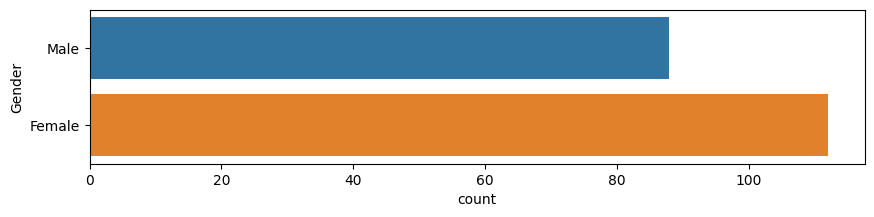

In [11]:
plt.figure(figsize=(10,2))
sns.countplot(y='Gender', data=df)

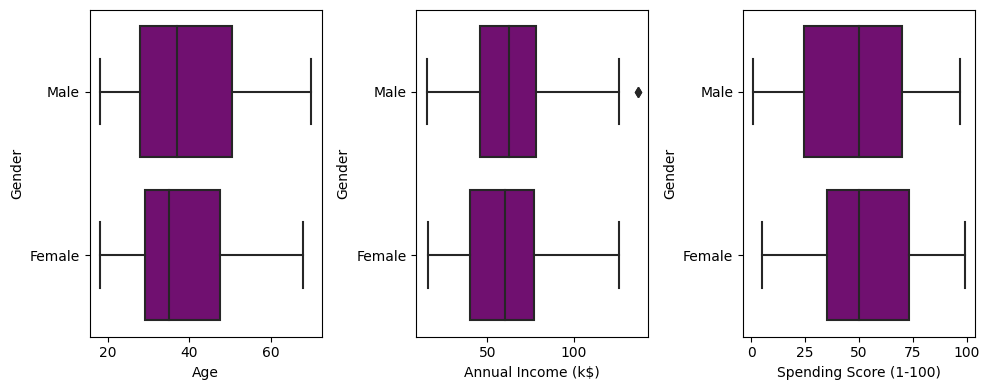

In [12]:
plt.figure(figsize=(10,4))
plotnumber=1
for column in df.columns[1:]:
    ax=plt.subplot(1,3,plotnumber)
    sns.boxplot(x=df[column], y='Gender', data=df, color='purple')
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

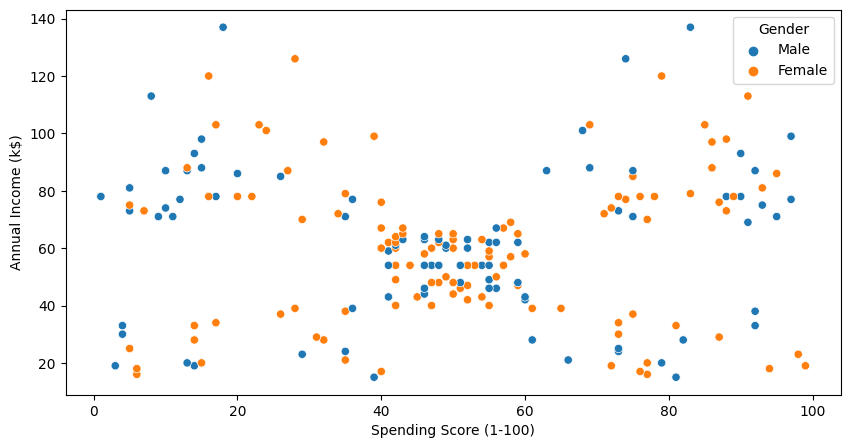

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df, hue='Gender')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

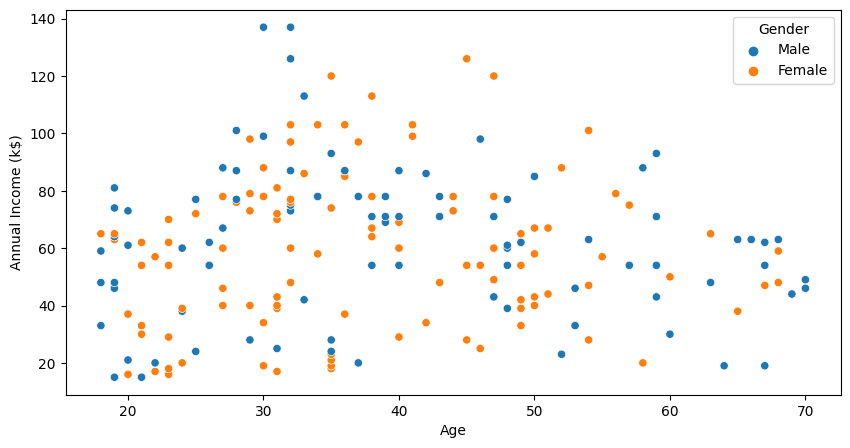

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='Gender')

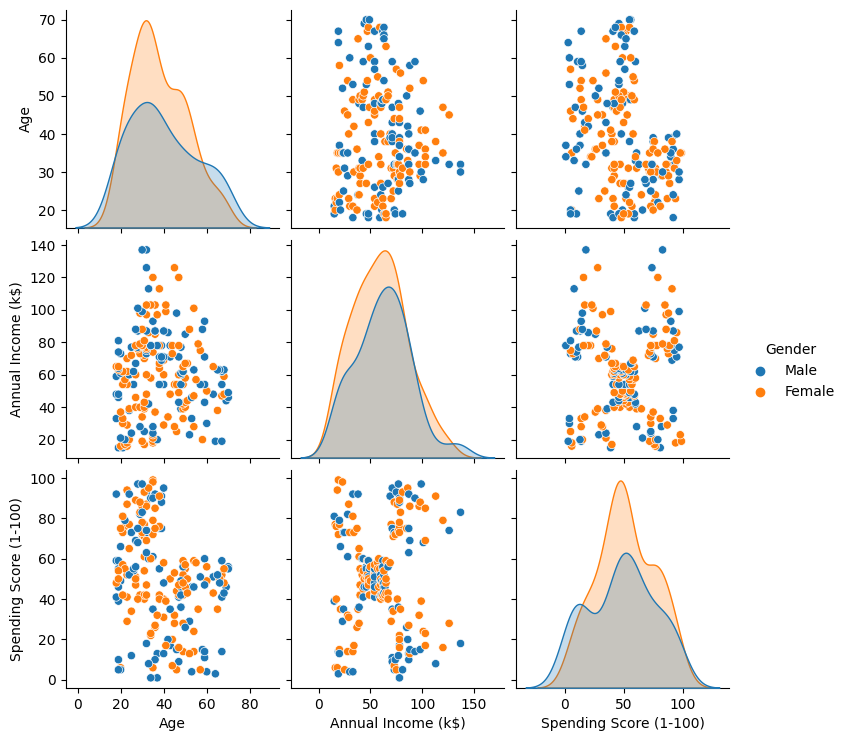

In [15]:
sns.pairplot(df, hue='Gender')

## K-Means Model.

In [16]:
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [17]:
X = df.iloc[:,1:]

In [18]:
import plotly.express as px
figs=[]
for i in range(2,7):
    kmean = KMeans(n_clusters=i, random_state=42)
    kmean.fit(X)
    df['Cluster']= kmean.labels_
    score=silhouette_score(X,df['Cluster'])
    
# Plot for cluster
    
    fig = px.scatter_3d(df, x='Age',y='Annual Income (k$)',z='Spending Score (1-100)',
                 color=df['Cluster'].astype(str),title=f"{i} clusters - Silhouette Score: {score:.3f}",
                 opacity=0.6)
    figs.append(fig)
    
for fig in figs:
    fig.show()

2 clusters - Silhouette Score: 0.293
3 clusters - Silhouette Score: 0.384
4 clusters - Silhouette Score: 0.405
5 clusters - Silhouette Score: 0.444
6 clusters - Silhouette Score: 0.452
7 clusters - Silhouette Score: 0.440
8 clusters - Silhouette Score: 0.430
9 clusters - Silhouette Score: 0.414
10 clusters - Silhouette Score: 0.377
11 clusters - Silhouette Score: 0.374
12 clusters - Silhouette Score: 0.352


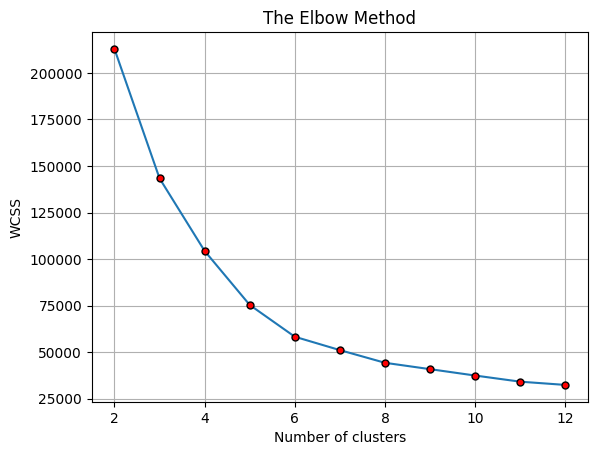

In [19]:
# Elbow method. (Best value for k).

wcss=[]
for i in range(2,13):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    label=kmeans.labels_
    score=silhouette_score(X,label)
    print(f"{i} clusters - Silhouette Score: {score:.3f}")

# Elbow Plot.

plt.plot(range(2,13),wcss, marker='.',mec='black',mfc='red', ms=10)
plt.grid(True)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- ### 6 clusters are giving best silhoutte score.

## PCA

In [20]:
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
pca_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-31.870508,-33.001425,-22.143910
1,0.763397,-56.843865,-10.543638
2,-57.408726,-13.122936,-28.750354
3,-2.169896,-53.477905,-9.511117
4,-32.174920,-30.387005,-10.224508


In [21]:
figs=[]
for i in range(2,10):
    kmean = KMeans(n_clusters=i, random_state=42)
    kmean.fit(pca_df)
    pca_df['Cluster']= kmean.labels_
    score=silhouette_score(pca_df,pca_df['Cluster'])
    
# Plot for cluster
    
    fig = px.scatter_3d(pca_df, x='Age',y='Annual Income (k$)',z='Spending Score (1-100)',
                 color=pca_df['Cluster'].astype(str),title=f"{i} clusters - Silhouette Score: {score:.3f}",
                 opacity=0.7)
    figs.append(fig)
    
for fig in figs:
    fig.show()

### If you like it Please Upvote, Thank you.